deep learning with anonymized structured data

In [5]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [6]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

PATH='data/satanderValue'

# Data Analysis

In [7]:
train = pd.read_csv(f'{PATH}/train.csv')

In [8]:
test = pd.read_csv(f'{PATH}/test.csv')

In [ ]:
train.head()

get some insight of the data 

In [8]:
df_complete.describe(include='all')
#DataFrameSummary(df).summary()

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,53801,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04,...,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04
unique,53801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,6fb55290c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.416718e+04,5.751534e+04,9.729739e+04,5.806099e+04,6.375839e+04,7.668399e+04,5.808513e+04,5.097307e+04,1.502720e+06,...,1.482509e+05,1.612076e+05,3.641199e+05,1.966222e+05,8.532581e+04,8.386201e+04,5.869383e+04,1.472437e+05,1.613294e+05,1.365085e+05
std,NaN,1.675093e+06,2.224589e+06,2.482945e+06,2.649759e+06,3.101213e+06,2.729676e+06,2.671233e+06,1.842928e+06,7.146372e+06,...,3.206337e+06,2.797313e+06,3.851028e+06,4.026793e+06,4.827649e+06,2.427350e+06,2.008782e+06,3.658007e+06,3.633263e+06,2.369828e+06
min,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [168]:
train.get_dtype_counts()

float64    1845
int64      3147
object        1
dtype: int64

<BarContainer object of 4993 artists>

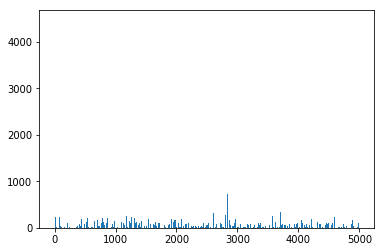

In [169]:
n_entries = train.nunique()
plt.bar(range(len(n_entries.values)), n_entries.values)

# autoencoder

merge training and test set

In [9]:
code_sz = 300

In [10]:
train_wo_target = train.drop(['target'], axis=1)
df_complete = pd.concat([train_wo_target, test], ignore_index=True)
df_complete['ID'] = pd.to_numeric(df_complete['ID'], errors='coerce')

In [11]:
data, _, nas, mapper = proc_df(df_complete, 'ID', do_scale=True)

In [12]:
class AeDataset(Dataset):
    def __init__(self, x):
        self.xs = x
    def __len__(self): return len(self.xs)
    def __getitem__(self, idx): return self.xs.iloc[idx].values.astype('float32')

    @classmethod
    def from_data_frame(cls, df):
        return cls(df)

In [13]:
dl = torch.utils.data.DataLoader(AeDataset.from_data_frame(data), batch_size=256, shuffle=True)

In [58]:
class autoencoder(nn.Module):
    def __init__(self, io_size, latent_size):
        super().__init__()
        
        self.enc = nn.Sequential(
            nn.Linear(io_size, 2500),
            nn.Dropout(0.3, inplace=True),
            nn.ReLU(True),
            nn.Linear(2500, 1000),
            nn.Dropout(0.5, inplace=True),
            nn.ReLU(True),
            nn.Linear(1000, latent_size),
            nn.Dropout(0.7, inplace=True))
        self.dec = nn.Sequential(
            nn.Linear(latent_size, 1000),
            nn.Dropout(0.3, inplace=True),
            nn.ReLU(True),
            nn.Linear(1000, 2500),
            nn.Dropout(0.5, inplace=True),
            nn.ReLU(True),
            nn.Linear(2500, io_size),
            nn.Dropout(0.7, inplace=True),
            nn.Sigmoid())
                
    def forward(self, x):
        x = self.enc(x)
        x = self.dec(x)
        return x

In [61]:
m = autoencoder(data.shape[1], code_sz).cuda()
criterion = nn.BCELoss()
opt = optim.Adam(m.parameters(), lr=1e-3)

In [62]:
it = iter(dl)
xs = next(it)
t = m(Variable(xs).cuda())

In [63]:
num_epochs = 10

for epoch in range(num_epochs):
    for dat in dl:
        img = Variable(dat).cuda()
        # ===================forward=====================
        output = m(img)
        loss = criterion(output, img)
        # ===================backward====================
        opt.zero_grad()
        loss.backward()
        l = opt.step()        
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
.format(epoch + 1, num_epochs, loss.data[0]))

torch.save(m.state_dict(), './autoencoder.pth')

epoch [1/10], loss:0.3606
epoch [2/10], loss:0.2786
epoch [3/10], loss:0.3583
epoch [4/10], loss:0.3573
epoch [5/10], loss:0.3229
epoch [6/10], loss:0.3170
epoch [7/10], loss:0.2565
epoch [8/10], loss:0.2214
epoch [9/10], loss:0.3116
epoch [10/10], loss:0.2989


# Prepare Training Data

In [17]:
df_train, y_train, _, _ = proc_df(train, 'target', skip_flds=['ID'], do_scale=True, na_dict=nas, mapper=mapper)

In [18]:
df_train.get_dtype_counts()

float64    4991
dtype: int64

In [19]:
validation_ratio = 0.15
val_idxs = get_cv_idxs(len(df_train), val_pct=validation_ratio)

# Prepare Test Data

In [20]:
test['target'] = 0

In [21]:
df_test, _, _, _ = proc_df(train, 'target', skip_flds=['ID'], do_scale=True, na_dict=nas, mapper=mapper)

## Model

evaluation function: Root Mean Squared Logarithmic Error (RMSLE)

In [25]:
def inv_y(a): return np.exp(a)

def rmsle(pred, targ):
    targ_log = targ
    pred_log = pred
    log_err = pred_log - targ_log
    return math.sqrt((log_err**2).mean())

In [26]:
yl_train = np.log(y_train)
max_log_y = np.max(yl_train)
y_range = (0, max_log_y*1.2)

In [64]:
class estimator(nn.Module):
    def __init__(self, code_sz):
        super().__init__()
        
        self.enc = m.enc
        self.head = nn.Sequential(
            nn.Linear(code_sz, 1000),
            nn.Dropout(0.4, inplace=True),
            nn.ReLU(True),
            nn.Linear(1000, 1),
            nn.Dropout(0.7, inplace=True),
            nn.Sigmoid())
                
    def forward(self, catvars ,x):
        x = x
        x = self.enc(x)
        x = self.head(x)
        return x
    
    def freeze():
         for param in self.enc: param.requires_grad = False

Model Data object

In [65]:
class SantanderModelData(ModelData):
    def __init__(self, path, trn_ds, val_ds, bs, test_ds=None, shuffle=True):
        test_dl = DataLoader(test_ds, bs, shuffle=False, num_workers=1) if test_ds is not None else None
        super().__init__(path, DataLoader(trn_ds, bs, shuffle=shuffle, num_workers=1),
            DataLoader(val_ds, bs*2, shuffle=False, num_workers=1), test_dl)
    
    @classmethod
    def from_data_frames(cls, path, trn_df, val_df, trn_y, val_y, cat_flds, bs=64, is_reg=True, is_multi=False, test_df=None, shuffle=True):
        trn_ds  = ColumnarDataset.from_data_frame(trn_df,  cat_flds, trn_y, is_reg, is_multi)
        val_ds  = ColumnarDataset.from_data_frame(val_df,  cat_flds, val_y, is_reg, is_multi)
        test_ds = ColumnarDataset.from_data_frame(test_df, cat_flds, None,  is_reg, is_multi) if test_df is not None else None
        return cls(path, trn_ds, val_ds, bs, test_ds=test_ds, shuffle=shuffle)

    @classmethod
    def from_data_frame(cls, path, val_idxs, df, y, cat_flds, bs=64, is_reg=True, is_multi=False, test_df=None, shuffle=True):
        ((val_df, trn_df), (val_y, trn_y)) = split_by_idx(val_idxs, df, y)
        return cls.from_data_frames(path, trn_df, val_df, trn_y, val_y, cat_flds, bs, is_reg, is_multi, test_df=test_df, shuffle=shuffle)

    def get_learner(self, **kwargs):
        model = estimator(code_sz)
        return Learner(self, BasicModel(to_gpu(model)), opt_fn=optim.Adam, **kwargs)

In [66]:
md = SantanderModelData.from_data_frame(PATH, val_idxs, df_train, yl_train, cat_flds=[], bs=64)#, test_df=pcaDf_test

In [67]:
learner = md.get_learner()
learner.freeze_to(1)

In [55]:
it = iter(md.trn_dl)
*somedata, somey= next(it)
t = learner.model(*V(somedata))

epoch      trn_loss   val_loss                            
    0      195.749405 185.362474



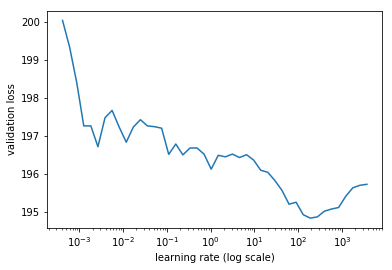

In [72]:
learner.lr_find(start_lr=1e-5, end_lr=50000)
learner.sched.plot()

In [31]:
lr=1e-2

In [32]:
learner.fit(lr, 10, metrics=[rmsle])

epoch      trn_loss   val_loss   rmsle                        
    0      185.696655 185.362471 13.565335 
 14%|█▍        | 522/3791 [00:04<00:27, 120.25it/s, loss=188]

KeyboardInterrupt: 

In [129]:
learner.fit(lr, 3, metrics=[rmsle], cycle_len=2)

epoch      trn_loss   val_loss   rmsle                     
    0      1.846508   2.674579   1.633051  
    1      1.70903    2.757484   1.658465                  
    2      1.736226   2.803976   1.672372                  
    3      1.619332   2.771854   1.662724                  
    4      1.686253   2.803825   1.671924                  
    5      1.603618   2.79815    1.66935                   



[2.7981495459874473, 1.6693504005892585]

In [114]:
learner.fit(lr, 2, metrics=[rmsle], cycle_len=4)

epoch      trn_loss   val_loss   rmsle                     
    0      2.023285   2.598347   1.609904  
    1      2.023014   2.727258   1.64731                   
    2      1.825987   2.755126   1.656442                  
    3      1.683871   2.792634   1.667299                  
    4      1.778463   3.046253   1.741506                  
    5      1.834863   2.568055   1.601397                  
    6      1.721297   2.722462   1.648865                  
    7      1.573864   2.741907   1.654763                  



[2.7419071197509766, 1.6547627445688555]

In [115]:
learner.save('val0')

# test and submit

In [116]:
m.load('val0')

In [117]:
x,y=m.predict_with_targs()

In [118]:
rmsle(x,y)

1.6621266598368651

In [119]:
pred_test=m.predict(True)

In [120]:
pred_test = np.exp(pred_test) - 1

create submission file

In [121]:
submission = pd.read_csv(f'{PATH}/sample_submission.csv')

In [122]:
submission['target'] = pred_test

In [123]:
submission[['ID','target']].to_csv(f'{PATH}/sample_submission.csv', index=False)